In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# from keras import load_weights
from keras.datasets import cifar10
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.models import Sequential

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 21s 0us/step


* Parte B: classes 1 e 4
* Parte A: as demais

**Dividir em A e B**

In [89]:
x_train.shape

(50000, 32, 32, 3)

In [95]:
x_train[0].shape

(32, 32, 3)

In [5]:
x_train_a = None
y_train_a = None
x_train_b = None
y_train_a = None
for i in range(len(y_train)):
    item = x_train[i]
    if y_train[i] is 1 or y_train[i] is 4:
        x_train_a.append(item)
    else:
        x_train_b

In [6]:
# A camada de output do Keras espera o target no formato onehot
# Como arrumar isso?
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


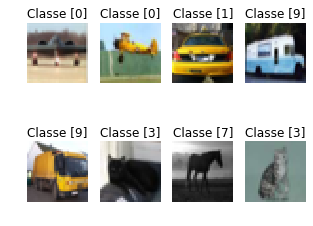

In [7]:
n_rows = 2
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5, 4))

for i in range(n_rows):
    for j in range(n_cols):
        img_i = np.random.randint(0, x_train.shape[0])
        axes[i][j].imshow(x_train[img_i], cmap="gray")
        axes[i][j].set_title("Classe {}".format(y_train[img_i]))
        axes[i][j].axis("off")
plt.show()

In [8]:
img_shape = x_train.shape[1:]
n_classes = 10

In [9]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

In [10]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [11]:
img_shape = x_train.shape[1:] 

### Modelo de treino

In [12]:
model = Sequential()
model.add(Conv2D(filters=400, kernel_size=(10, 10), activation="relu", padding="same", name="InputConv1", input_shape=img_shape))
model.add(Conv2D(filters=300, kernel_size=(3, 3), activation="relu", padding="same", name="Conv2"))
model.add(MaxPooling2D(pool_size=(2, 2), name="Pool1"))

model.add(Conv2D(filters=200, kernel_size=(5, 5), activation="relu", padding="same", name="Conv3"))
model.add(Conv2D(filters=100, kernel_size=(3, 3), activation="relu", padding="same", name="Conv4"))
model.add(MaxPooling2D(pool_size=(2, 2), name="Pool2"))

model.add(Flatten(name="Flatten"))
model.add(Dense(64, activation="relu", name="Dense1"))
model.add(Dropout(0.2, name="Dropout"))
model.add(Dense(n_classes, activation='softmax', name="Output"))

model.summary()

W0628 08:32:07.041276 140368663537408 deprecation_wrapper.py:119] From /home/valeriaps/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0628 08:32:07.070018 140368663537408 deprecation_wrapper.py:119] From /home/valeriaps/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 08:32:07.074285 140368663537408 deprecation_wrapper.py:119] From /home/valeriaps/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0628 08:32:07.130527 140368663537408 deprecation_wrapper.py:119] From /home/valeriaps/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d inste

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputConv1 (Conv2D)          (None, 32, 32, 400)       120400    
_________________________________________________________________
Conv2 (Conv2D)               (None, 32, 32, 300)       1080300   
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 16, 16, 300)       0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 16, 16, 200)       1500200   
_________________________________________________________________
Conv4 (Conv2D)               (None, 16, 16, 100)       180100    
_________________________________________________________________
Pool2 (MaxPooling2D)         (None, 8, 8, 100)         0         
_________________________________________________________________
Flatten (Flatten)            (None, 6400)              0         
__________

In [60]:
optimizer = Adam(lr=0.01)
model.compile(optimizer, loss="binary_crossentropy", metrics=["accuracy"])

In [61]:
y_train.shape[:]

(50000, 10)

In [62]:
batch_size=128
epochs=10
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
  896/50000 [..............................] - ETA: 40:15 - loss: 2.6884 - acc: 0.8225

KeyboardInterrupt: 

In [50]:
weights = "/mnt/d/OneDrive/machine-learning/tp2/valeria.h5"
model.save_weights(weights)

## Modelo para transfer learning

In [55]:
transfer_w = keras.load_weights(weights)

NameError: name 'keras' is not defined